In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Відобразимо датасет student_scores.csv, який даний нам для виконання домашнього завдання:

In [3]:
data = pd.read_csv('C:/Users/Vitalii/Downloads/Telegram Desktop/student_scores.csv')
data

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Побудуємо модель простої регресії для знаходження залежності між значеннями протяжності навчання і середнього балу студентів:

In [5]:
X = data['hours']
y = data['scores']
model = LinearRegression()

In [6]:
X_train = np.array(X).reshape(-1,1)

In [7]:
y_train = np.array(y)

In [8]:
model.fit(X_train, y_train)

LinearRegression()

На даному етапі наша модель натренована. Тепер ми можемо її "запредиктити":

In [9]:
X_new = np.random.randint(1,10,(25,1))
y_new = model.predict(X_new)

Побудуємо графік:

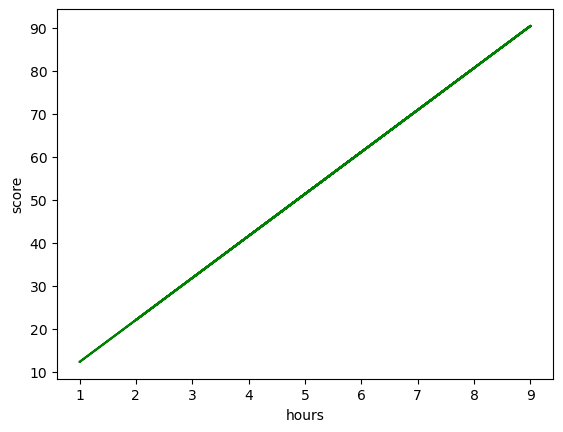

In [10]:
plt.plot(X_new, y_new, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

Відобразимо параметри b і m, де m відповідає за нахил, а b - початковий зсув:

In [11]:
b, m = model.intercept_, model.coef_
m = m[0]

In [12]:
b, m

(2.483673405373196, 9.775803390787472)

Відобразимо коефіцієнт детермінації $R^2$, що відображає певну оцінку якості тренування:

In [13]:
model.score(X_train, y_train)

0.9529481969048356

Побудуємо графік, що відображає, як натренувалась наша модель відносно вихідних даних:

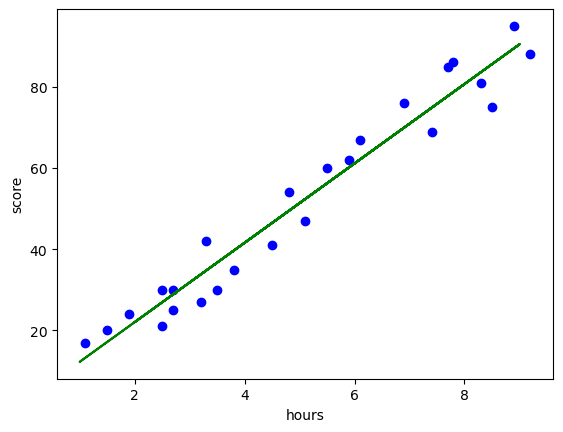

In [14]:
plt.scatter(data.hours, data.scores, color='blue')
plt.plot(X_new, y_new, color='green')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

**Оцінка якості отриманої регресії:**

In [15]:
mae = mean_absolute_error(y_train, y_new)
mse = mean_squared_error(y_train, y_new)
rmse = np.sqrt(mse)

In [16]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 31.34
Mean squared error: 1324.99
Root mean squared error: 36.40
